# KE 5018 - Workshop 2B Sentosa Bank Customer Propensity Modelling - Predict Purchase

## Load libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.models import load_model
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
import myUtilities as mu
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Using TensorFlow backend.


## Load data

In [2]:
cust_df = pd.read_csv(os.path.join('data', 'custdatabase.csv'), index_col=0)
cust_df.head()

,sex,mstatus,age,children,occupation,education,income,avbal,avtrans,Unnamed: 10
index,,,,,,,,,,
1001,M,divorced,44.27,2,legal,postgrad,10245.73,53183.04,4069.67,
1002,M,married,61.90,1,legal,secondary,1942.57,18100.78,1522.42,NaN
1003,M,divorced,37.30,1,IT,tertiary,9896.16,24496.82,2723.35,NaN
1004,F,divorced,25.02,1,legal,postgrad,10136.44,26690.01,4143.04,NaN
1005,F,divorced,48.37,2,government,secondary,2521.11,13439.81,240.26,NaN


In [3]:
cust_df.columns

In [4]:
# Remove whitespaces from column names
cust_df.columns = [ i.replace(' ', '') for i in cust_df.columns ]
cust_df.columns

Index(['sex', 'mstatus', 'age', 'children', 'occupation', 'education',
       'income', 'avbal', 'avtrans', 'Unnamed:10'],
      dtype='object')

In [5]:
cust_df.drop(cust_df.columns[-1:], axis=1, inplace=True)
cust_df.head()

,sex,mstatus,age,children,occupation,education,income,avbal,avtrans
index,,,,,,,,,
1001,M,divorced,44.27,2,legal,postgrad,10245.73,53183.04,4069.67
1002,M,married,61.90,1,legal,secondary,1942.57,18100.78,1522.42
1003,M,divorced,37.30,1,IT,tertiary,9896.16,24496.82,2723.35
1004,F,divorced,25.02,1,legal,postgrad,10136.44,26690.01,4143.04
1005,F,divorced,48.37,2,government,secondary,2521.11,13439.81,240.26


In [6]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1001 to 5000
Data columns (total 9 columns):
sex           4000 non-null object
mstatus       4000 non-null object
age           4000 non-null float64
children      4000 non-null int64
occupation    4000 non-null object
education     4000 non-null object
income        4000 non-null float64
avbal         4000 non-null float64
avtrans       4000 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 312.5+ KB


In [7]:
cust_df['children'] = cust_df['children'].astype('float64')
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1001 to 5000
Data columns (total 9 columns):
sex           4000 non-null object
mstatus       4000 non-null object
age           4000 non-null float64
children      4000 non-null float64
occupation    4000 non-null object
education     4000 non-null object
income        4000 non-null float64
avbal         4000 non-null float64
avtrans       4000 non-null float64
dtypes: float64(5), object(4)
memory usage: 312.5+ KB


In [8]:
nnmodel = load_model(os.path.join('data', 'final', 'final_model.h5'))
nnmodel

## Transform data

In [9]:
num_cols = list(cust_df.columns.to_series().groupby(cust_df.dtypes).groups[np.dtype('float64')])
cat_cols = [ i for i in cust_df.columns if i not in num_cols]

num_pipeline = Pipeline([
    ('selector', mu.DataFrameSelector(num_cols)),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', mu.DataFrameSelector(cat_cols)),
    ('label_binarizer', mu.LabelBinarizerForPipeline())
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

X_transf = full_pipeline.fit_transform(cust_df)
X_transf

array([[ 0.25359222,  1.03035567,  1.49297695, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.50639515,  0.08028129, -1.01775507, ...,  0.        ,
         1.        ,  0.        ],
       [-0.24170196,  0.08028129,  1.38727303, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [-1.59327949, -0.8697931 ,  1.0286562 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.63893216, -0.8697931 ,  0.23492881, ...,  0.        ,
         0.        ,  0.        ],
       [-0.04912704,  0.08028129, -0.45291324, ...,  0.        ,
         0.        ,  1.        ]])

In [10]:
X_transf[0]

array([ 0.25359222,  1.03035567,  1.49297695,  2.59985285,  1.62100477,
        1.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ])

In [11]:
len(X_transf[0])

23

In [12]:
y_proba = nnmodel.predict(X_transf)
y_proba

array([[  5.48483850e-03,   5.48422188e-02,   9.39672947e-01],
       [  3.28597635e-01,   3.84998089e-10,   6.71402335e-01],
       [  4.70157131e-04,   2.46007189e-01,   7.53522694e-01],
       ..., 
       [  1.22796046e-04,   7.51733303e-01,   2.48143867e-01],
       [  2.17781067e-04,   6.96564257e-01,   3.03217947e-01],
       [  5.01494169e-01,   1.59554395e-06,   4.98504192e-01]], dtype=float32)

In [13]:
y_num = nnmodel.predict_classes(X_transf)
y_num

array([2, 2, 2, ..., 1, 1, 0])

In [14]:
le = LabelEncoder()
le.fit(['A', 'B', 'None'])
le.classes_

array(['A', 'B', 'None'],
      dtype='<U4')

In [15]:
y_labels = le.inverse_transform(y_num)
y_labels

array(['None', 'None', 'None', ..., 'B', 'B', 'A'],
      dtype='<U4')

In [16]:
cust_df['status'] = y_labels
cust_df.head()

,sex,mstatus,age,children,occupation,education,income,avbal,avtrans,status
index,,,,,,,,,,
1001,M,divorced,44.27,2.0,legal,postgrad,10245.73,53183.04,4069.67,None
1002,M,married,61.90,1.0,legal,secondary,1942.57,18100.78,1522.42,None
1003,M,divorced,37.30,1.0,IT,tertiary,9896.16,24496.82,2723.35,None
1004,F,divorced,25.02,1.0,legal,postgrad,10136.44,26690.01,4143.04,B
1005,F,divorced,48.37,2.0,government,secondary,2521.11,13439.81,240.26,None


In [17]:
cust_df['status_prob'] = np.amax(y_proba, axis=1)
cust_df.head()

,sex,mstatus,age,children,occupation,education,income,avbal,avtrans,status,status_prob
index,,,,,,,,,,,
1001,M,divorced,44.27,2.0,legal,postgrad,10245.73,53183.04,4069.67,None,0.939673
1002,M,married,61.90,1.0,legal,secondary,1942.57,18100.78,1522.42,None,0.671402
1003,M,divorced,37.30,1.0,IT,tertiary,9896.16,24496.82,2723.35,None,0.753523
1004,F,divorced,25.02,1.0,legal,postgrad,10136.44,26690.01,4143.04,B,0.794185
1005,F,divorced,48.37,2.0,government,secondary,2521.11,13439.81,240.26,None,0.999145


## Save data to file

In [18]:
cust_df.reset_index(inplace=True)
cust_df.to_csv(os.path.join('data', 'final', 'custdatabase-predicted.csv'), index=False)

## Load actual data for scoring

In [19]:
actual_df = pd.read_csv(os.path.join('data', 'Cust_Actual.csv'), index_col=0)
actual_df.head()

,status,cust Investment Potential Score
index,,
1001,None,5.2
1002,None,2.5
1003,None,4.1
1004,None,4.4
1005,None,2.3


In [20]:
actual_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1001 to 5000
Data columns (total 2 columns):
status                              4000 non-null object
cust Investment Potential Score     4000 non-null float64
dtypes: float64(1), object(1)
memory usage: 93.8+ KB


In [21]:
le.transform(actual_df['status'])

array([2, 2, 2, ..., 1, 2, 0])

In [22]:
cnf_matrix = confusion_matrix(le.transform(actual_df['status']), y_num)

Confusion matrix, without normalization
[[ 161    0  337]
 [   0  101   98]
 [ 345  390 2568]]


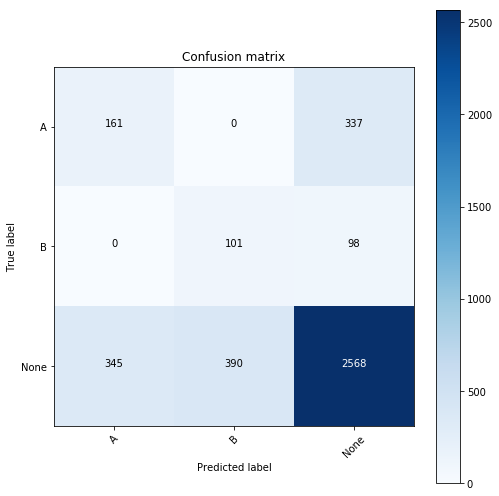

In [23]:
plt.figure(figsize=(7, 7))
mu.plot_confusion_matrix(cnf_matrix, classes=['A', 'B', 'None'], title='Confusion matrix')
plt.show()

In [24]:
print('Test Results\n\n', classification_report(le.transform(actual_df['status']), y_num, target_names=['A', 'B', 'None']))

Test Results

               precision    recall  f1-score   support

           A       0.32      0.32      0.32       498
           B       0.21      0.51      0.29       199
        None       0.86      0.78      0.81      3303

   micro avg       0.71      0.71      0.71      4000
   macro avg       0.46      0.54      0.48      4000
weighted avg       0.76      0.71      0.73      4000



## Check the probability of the predictions

In [25]:
cust_df[cust_df['status_prob']<.5]

,index,sex,mstatus,age,children,occupation,education,income,avbal,avtrans,status,status_prob
1576,2577,M,married,20.71,1.0,legal,tertiary,9380.78,30155.19,2445.11,None,0.499673
2467,3468,M,single,35.65,0.0,finance,tertiary,5870.24,20676.92,1971.71,B,0.499990
2693,3694,M,married,35.29,0.0,construct,secondary,13323.66,42042.22,1863.74,None,0.473822
